---

#### Este notebook contiene una implementación ingenua del algoritmo de Sinkhorn

---

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def Sinkhorn_Knopp(mu, nu, C, reg = 1e-1, iteraciones_maximas = 1e10, error_minimo=1e-1):
    '''
    Esta función realiza el algoritmo de sinkhorn-Knopp para calcular
    la solución al problema de transporte óptimo (Kantorovich) regularizado.

    input:
            mu:  Distribución source
            nu:  Distribución target
            C:   Matriz de costo
            reg: Factor de regularización
            iteraciones_maximas: Cantidad máxima de iteraciones
            error_minimo: Error minimimo a partir del cual se considera "buena" la solución
    
    output: 
            T: Matriz de transporte
            error: Error obtenido con T
    '''
   
    v = np.ones_like(mu)
    xi = np.exp(- C / reg)
    
    error = 1

    iteraciones = 0
    # A continuación cominenza el proceso iterativo
    while error > error_minimo:
        u = np.divide(mu, np.dot(xi.T, v))
        v = np.divide(nu, np.dot(xi, u))

        # Medimos que tan lejos está T de mu y T de nu
        diag_u = np.diag(u)
        diag_v = np.diag(v)
        T = np.dot(np.dot(diag_u, xi), diag_v)

        error = np.linalg.norm(T.sum(axis=1) - mu, 1) + np.linalg.norm(T.sum(axis=0) - nu, 1)

        iteraciones += 1

        if iteraciones % 1000 == 0: 
            print(f"Iteración {iteraciones}, Error {error}")

        if iteraciones > iteraciones_maximas:
            print(f"Límite de iteraciones, error alcanzado: {error}")
            break
        
    return T, error


def plot_transporte(mu, nu, T, threshold=1e-8):
    '''  
    Función para plotear el transporte óptimo en el caso de distribuciones bidimensionales

    input:
            mu:  Distribución source
            nu:  Distribución target
            T:   Matriz de transporte
            tthreshold: límite al partir del cual no graficamos el segmento
    
    output: 
            T: Matriz de transporte
            error: Error obtenido con T
    '''

    plt.figure(figsize=(12, 8))

    # Puntos
    plt.scatter(mu[:, 0], mu[:, 1], label='mu', color='blue')
    plt.scatter(nu[:, 0], nu[:, 1], label='nu', color='red')

    # Segmentos
    mx = T.max()
    for i in range(nu.shape[0]):
        for j in range(mu.shape[0]):
            if T[i, j] / mx > threshold:
                plt.plot([nu[i, 0], mu[j, 0]], [nu[i, 1], mu[j, 1]],
                        alpha = T[i, j] / mx, color='black')


Prueba simple

In [4]:
mu = np.array([1, 1, 0, 0, 0])
nu = np.array([0, 0, 0, 1, 1])

C = (mu[:, np.newaxis] - nu)**2


T, err = Sinkhorn_Knopp(mu, nu, C, 1e-1, 2)

np.dot(T.T, mu)




array([0., 0., 0., 1., 1.])

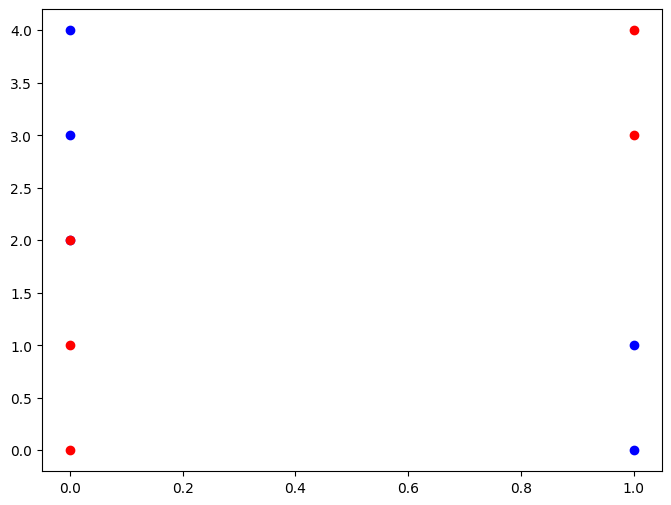

In [44]:
mu = np.zeros((5, 2))
mu[:, 0] = np.array([1, 1, 0, 0, 0])
mu[:, 1] = np.array(([0, 1, 2, 3, 4]))

nu = np.zeros((5, 2))
nu[:, 0] = np.array([0, 0, 0, 1, 1])
nu[:, 1] = np.array(([0, 1, 2, 3, 4]))

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(mu[:, 0], mu[:, 1], label='mu', color='blue')
plt.scatter(nu[:, 0], nu[:, 1], label='nu', color='red')


C = cdist(mu, nu, 'euclidean')


In [51]:
mu_d = np.ones(mu.shape[0]) / mu.shape[0]
nu_d = np.ones(nu.shape[0]) / nu.shape[0]
T, err = Sinkhorn_Knopp(mu_d, nu_d, C, 1e-1, 2)



Límite de iteraciones, error alcanzado: 0.18485459975258176


array([[1.98896019e-01, 8.69976288e-03, 3.55406655e-07, 3.96745319e-10,
        1.74772864e-14],
       [1.10398041e-03, 1.91274019e-01, 4.60506594e-04, 3.05280141e-06,
        1.34480943e-10],
       [8.38357602e-10, 5.08349143e-05, 1.69665456e-01, 2.83950632e-07,
        7.42816387e-11],
       [4.19042365e-10, 2.54091842e-05, 8.48051164e-02, 1.96753710e-01,
        3.03335539e-03],
       [1.96279914e-14, 1.19016904e-09, 3.97228116e-06, 3.22536619e-03,
        1.96966644e-01]])

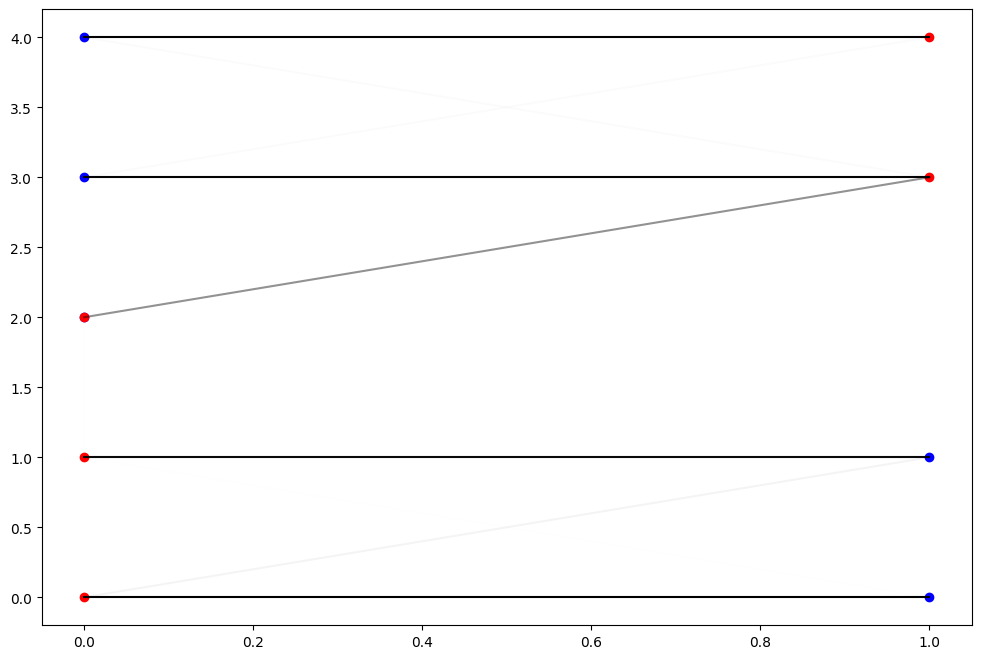

In [59]:
plot_transporte(mu, nu, T, threshold=1e-8)